<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Ramki/E533_DLS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print("Training Data:",x_train.shape)
print("Training Label Data:",y_train.shape)
print("Testing Data:",x_test.shape)
print("Testing Label Data:",y_test.shape)

Training Data: (60000, 28, 28)
Training Label Data: (60000,)
Testing Data: (10000, 28, 28)
Testing Label Data: (10000,)


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(10)
])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
Non-

In [8]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-45.787796  ,   0.19784594, -13.6583    ,  10.941376  ,
          7.132572  ,  22.440763  , -20.241795  ,   5.4403334 ,
        -37.633423  ,  -5.7818785 ]], dtype=float32)

In [9]:
tf.nn.softmax(predictions).numpy()

array([[2.3372640e-30, 2.1878570e-10, 2.1007349e-16, 1.0136192e-05,
        2.2476698e-07, 9.9998963e-01, 2.9053396e-19, 4.1381103e-08,
        8.1303094e-27, 5.5342433e-13]], dtype=float32)

In [10]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 1.7496 - acc: 0.9118
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1106 - acc: 0.9668
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0887 - acc: 0.9735
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0756 - acc: 0.9765
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0680 - acc: 0.9799
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0664 - acc: 0.9806
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0581 - acc: 0.9836
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0626 - acc: 0.9815
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0573 - acc: 0.9838
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0474 - acc: 0.9863
Epoch 11/20
469/469 [============================

In [12]:
history.history

{'loss': [1.749609112739563,
  0.1106211319565773,
  0.08874106407165527,
  0.07561717927455902,
  0.06797591596841812,
  0.06637528538703918,
  0.058092597872018814,
  0.06260458379983902,
  0.057294052094221115,
  0.04743577912449837,
  0.04654974862933159,
  0.05981273204088211,
  0.05350596085190773,
  0.04728683829307556,
  0.05444011464715004,
  0.042576614767313004,
  0.043442804366350174,
  0.04708782210946083,
  0.03654449060559273,
  0.04550014063715935],
 'acc': [0.9117666482925415,
  0.966783344745636,
  0.9735000133514404,
  0.9764999747276306,
  0.9798666834831238,
  0.9806333184242249,
  0.9836166501045227,
  0.9815499782562256,
  0.9838333129882812,
  0.9862833619117737,
  0.9873833060264587,
  0.984416663646698,
  0.98580002784729,
  0.9876333475112915,
  0.9871833324432373,
  0.9889333248138428,
  0.9891666769981384,
  0.9890166521072388,
  0.9907166957855225,
  0.9893500208854675]}

In [13]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1712 - acc: 0.9729


In [14]:
print(test_acc)

0.9728999733924866


In [21]:
# evaluate the model
y_pred =  tf.nn.softmax(model.predict(x_test))

In [16]:
# y_pred = y_pred.numpy().argmax(axis=1)

In [ ]:
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [17]:
result = np.where(y_pred == 8)
print(result[0].shape)

(975,)


In [19]:
confusion_matrix(y_test, y_pred)

array([[ 966,    1,    1,    1,    0,    2,    4,    1,    1,    3],
       [   0, 1116,    4,    1,    0,    0,    2,    3,    9,    0],
       [   0,    0,  995,   16,    3,    0,    1,    4,   12,    1],
       [   0,    0,    2,  982,    0,    5,    0,    1,    1,   19],
       [   1,    0,    2,    0,  960,    0,    7,    2,    2,    8],
       [   2,    0,    0,   16,    2,  856,    8,    0,    2,    6],
       [   7,    2,    0,    1,    3,    4,  938,    0,    3,    0],
       [   2,    0,    4,    5,    3,    0,    0, 1003,    5,    6],
       [   4,    0,    1,    5,    3,    5,    7,    3,  937,    9],
       [   1,    1,    0,    0,   11,    2,    1,   14,    3,  976]])

Instructions for updating:
Use tf.identity instead.


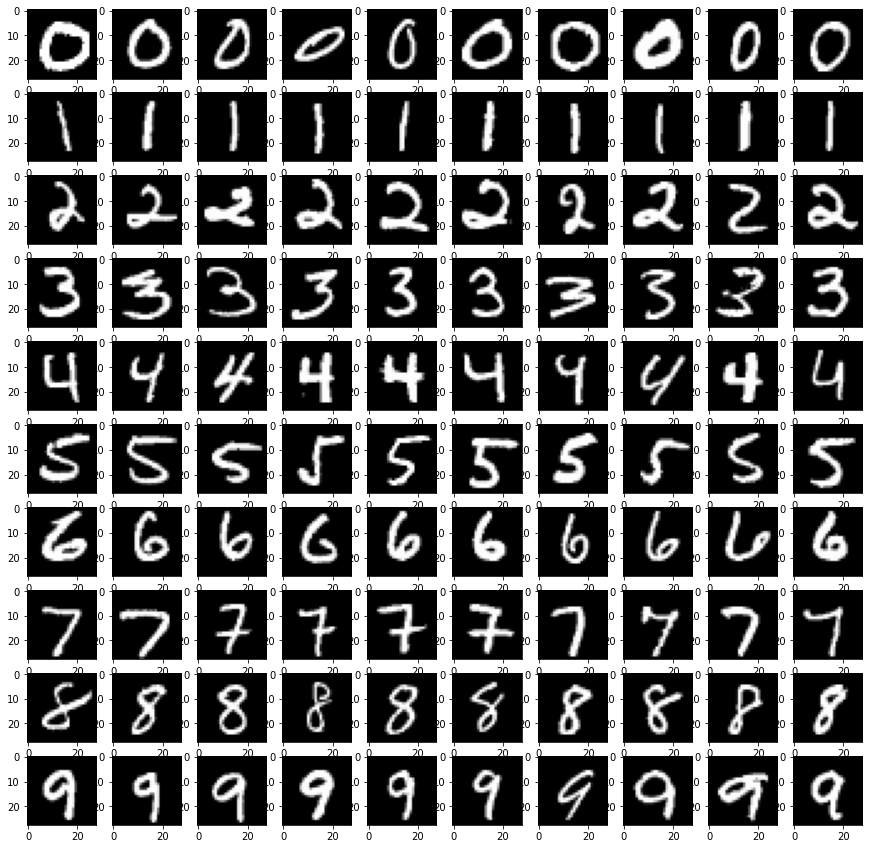

In [22]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):  
    result = y_pred[:,i].cpu().numpy()
    result_idx = (-result).argsort()[:10]
    for j in range(10):
      axs[i,j].imshow(x_test[result_idx[j]], cmap=plt.get_cmap('gray'))
plt.show()

In [23]:
total_idx = np.array(range(0,len(x_test)))
random_idxs = np.random.choice(a=total_idx,size=1000,replace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

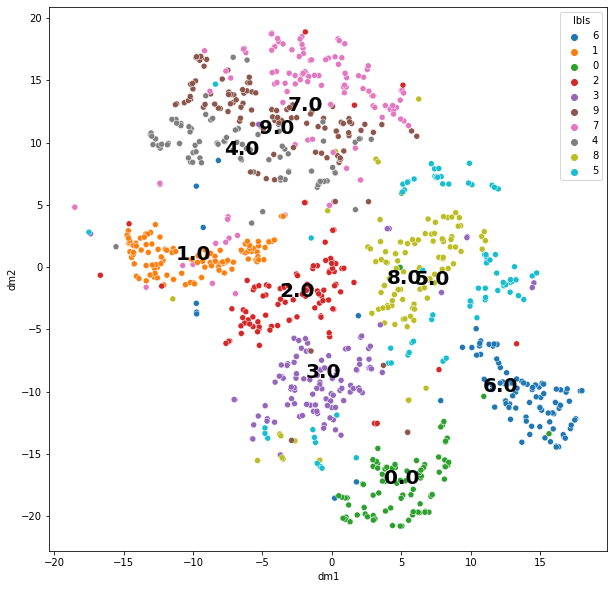

In [25]:
test_imgs = x_test[random_idxs]
test_labels = y_test[random_idxs]

#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(test_imgs.reshape([1000,28*28]))
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

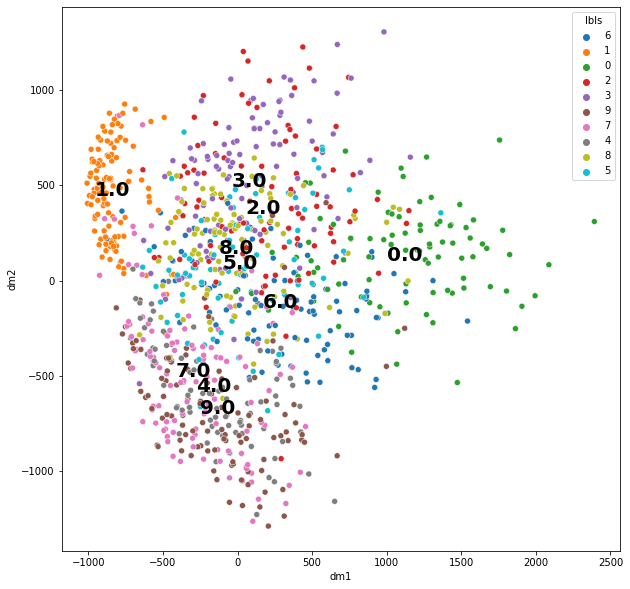

In [26]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(test_imgs.reshape([1000,28*28]))

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [27]:
model

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Model
act_model1 = Model(inputs=[model.input], outputs=[model.layers[1].output,])
act_model1.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h1_activations = act_model1.predict(test_imgs)

In [59]:
print(h1_activations.shape)

(1000, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

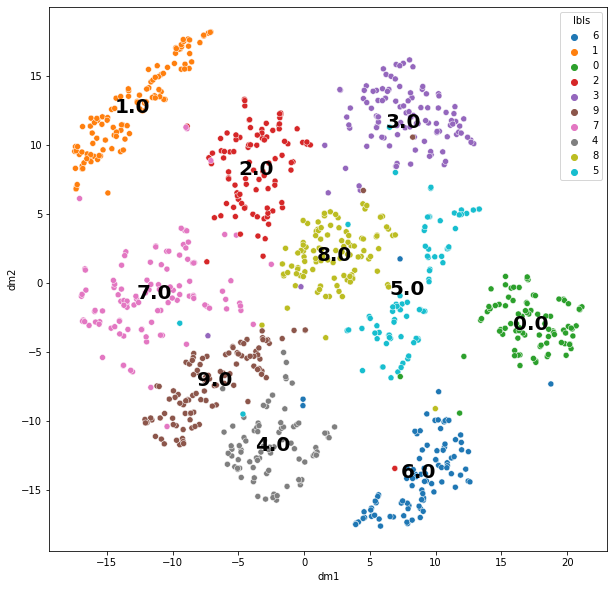

In [60]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h1_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

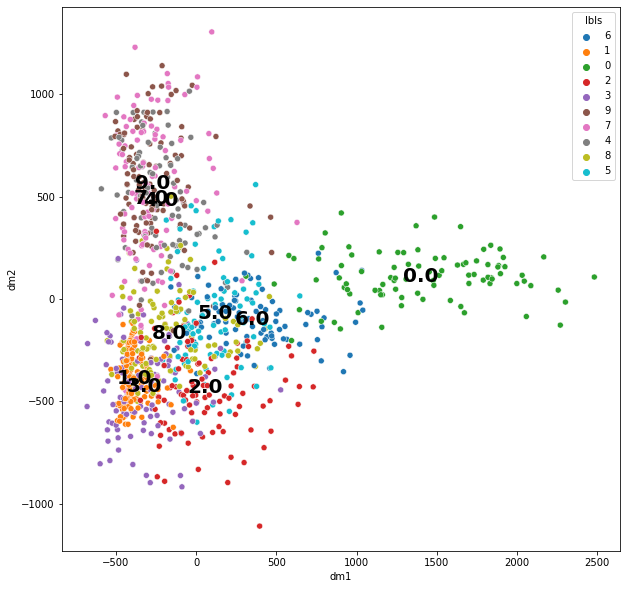

In [61]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h1_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [173]:
act_model2 = tf.keras.models.Sequential(model.layers[:3])
# act_model2 = Model(inputs=[model.input], outputs=[model.layers[2].output,])
act_model2.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h2_activations = act_model2.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

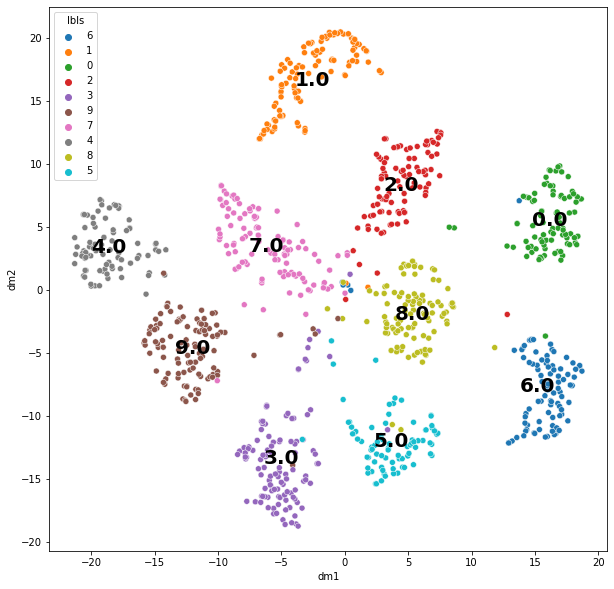

In [174]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h2_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

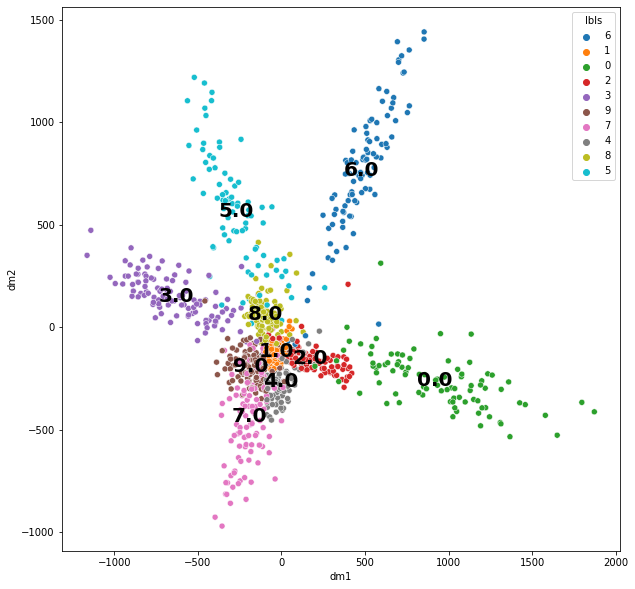

In [175]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h2_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [170]:
act_model3 = tf.keras.models.Sequential(model.layers[:4])
# act_model3 = Model(inputs=[model.input], outputs=[model.layers[3].output,])
act_model3.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h3_activations = act_model2.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

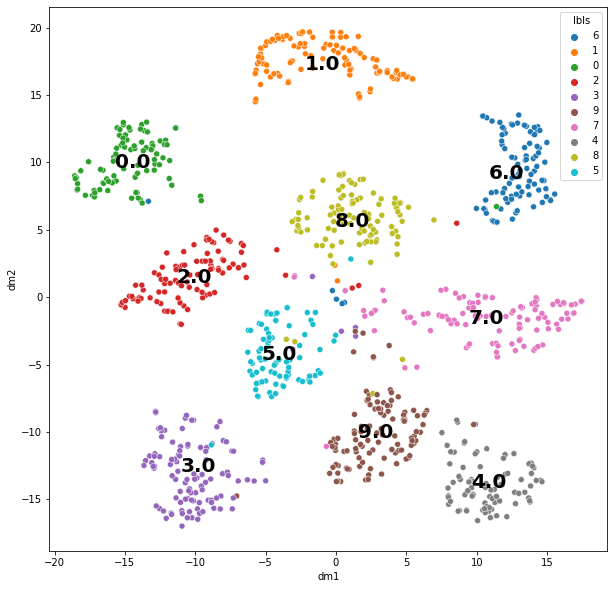

In [171]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h3_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

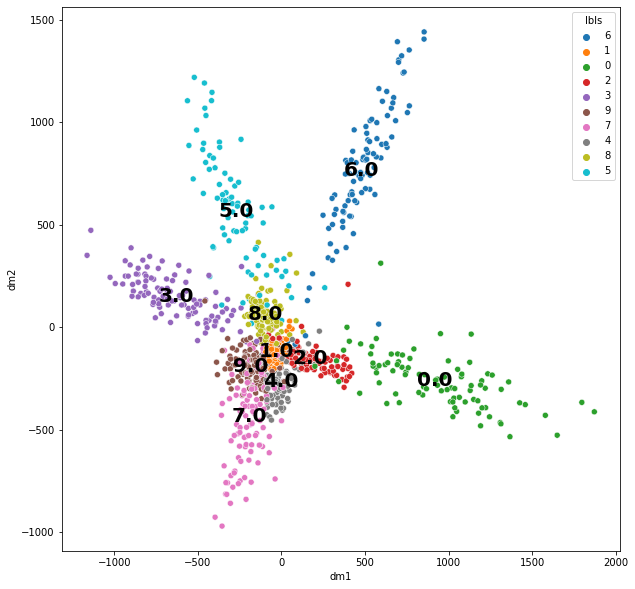

In [172]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h3_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [166]:
act_model4 = tf.keras.models.Sequential(model.layers[:5])
# act_model4 = Model(inputs=[model.input], outputs=[model.layers[4].output,])
act_model4.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h4_activations = act_model4.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

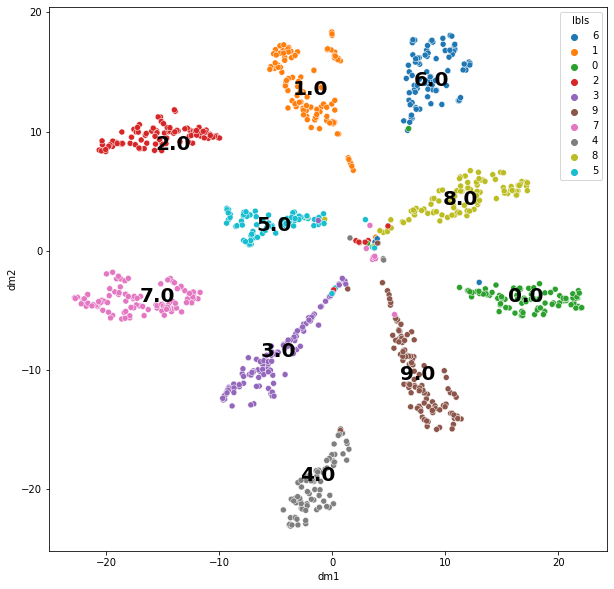

In [167]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h4_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

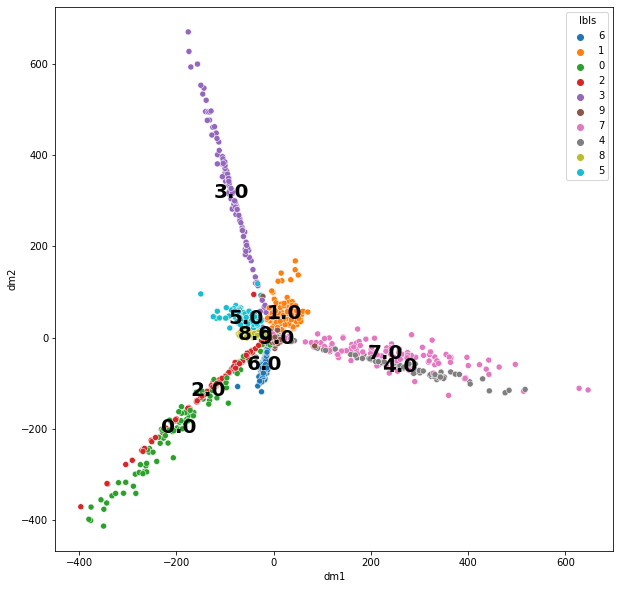

In [168]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h4_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [163]:
act_model5 = tf.keras.models.Sequential(model.layers)
# act_model5 = Model(inputs=[model.input], outputs=[model.layers[5].output,])
act_model5.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h5_activations = act_model5.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

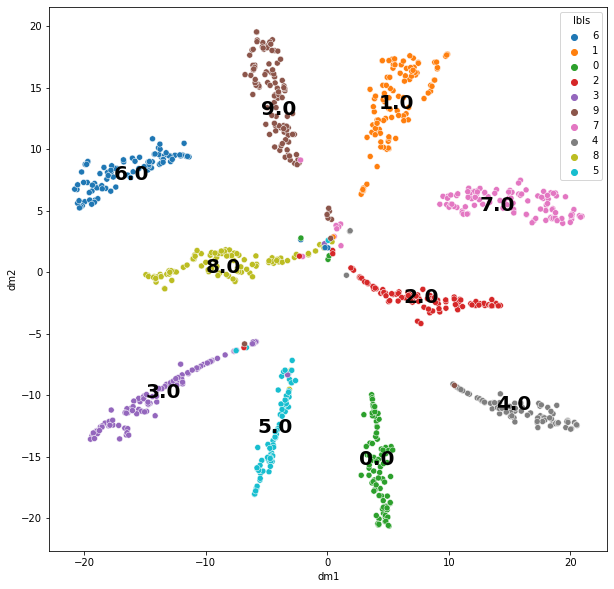

In [164]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h5_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

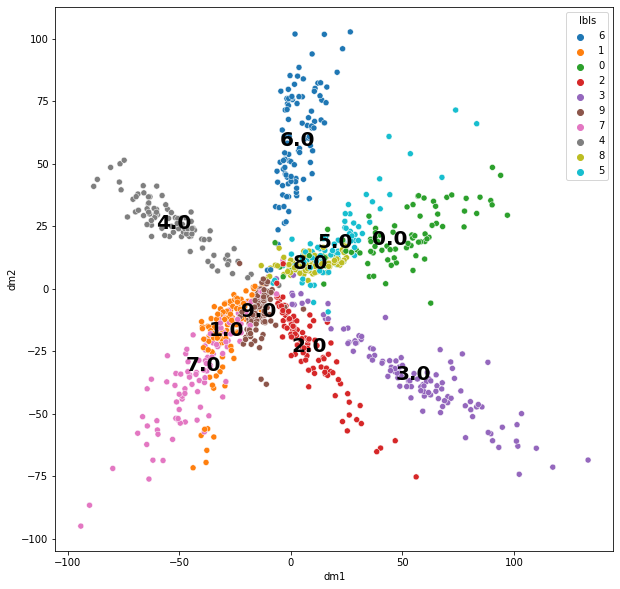

In [165]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h5_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

Problem 2: Adult Optimization

In [130]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
xavier_initializer = tf.keras.initializers.GlorotUniform(seed=None)
he_initializer = tf.keras.initializers.HeUniform(seed=None)

In [123]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(10)
])

In [124]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10)
])

In [139]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(10)
])
model3.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_136 (Dense)           (None, 512)               401920    
                                                                 
 dense_137 (Dense)           (None, 512)               262656    
                                                                 
 dense_138 (Dense)           (None, 512)               262656    
                                                                 
 dense_139 (Dense)           (None, 512)               262656    
                                                                 
 dense_140 (Dense)           (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
N

In [143]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10)
])
model4.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_151 (Dense)           (None, 512)               401920    
                                                                 
 dense_152 (Dense)           (None, 512)               262656    
                                                                 
 dense_153 (Dense)           (None, 512)               262656    
                                                                 
 dense_154 (Dense)           (None, 512)               262656    
                                                                 
 dense_155 (Dense)           (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
N

In [144]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(10)
])

In [146]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# print("[INFO] training network...")
model1.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [81]:
history1 = model1.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 2.3036 - accuracy: 0.1063 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3034 - accuracy: 0.1084 - val_loss: 2.3064 - val_accuracy: 0.0958
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3039 - accuracy: 0.1070 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3034 - accuracy: 0.1064 - val_loss: 2.3043 - val_accuracy: 0.1028
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3036 - accuracy: 0.1094 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3034 - accuracy: 0.1073 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3034 - accuracy: 0.1068 - val_loss: 2.3038 - val_accuracy: 0.0958

In [83]:
history2 = model2.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9773 - accuracy: 0.7256 - val_loss: 0.9039 - val_accuracy: 0.7488
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.8516 - accuracy: 0.7681 - val_loss: 0.7976 - val_accuracy: 0.7826
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.7559 - accuracy: 0.7983 - val_loss: 0.7134 - val_accuracy: 0.8072
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6822 - accuracy: 0.8204 - val_loss: 0.6483 - val_accuracy: 0.8338
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6224 - accuracy: 0.8392 - val_loss: 0.5947 - val_accuracy: 0.8468
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5722 - accuracy: 0.8543 - val_loss: 0.5510 - val_accuracy: 0.8608
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.5292 - accuracy: 0.8659 - val_loss: 0.5140 - val_accuracy: 0.8703

In [150]:
history3 = model3.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.1960 - accuracy: 0.7066 - val_loss: 0.4530 - val_accuracy: 0.8790
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3837 - accuracy: 0.8912 - val_loss: 0.3187 - val_accuracy: 0.9094
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3017 - accuracy: 0.9125 - val_loss: 0.2796 - val_accuracy: 0.9170
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2603 - accuracy: 0.9241 - val_loss: 0.2360 - val_accuracy: 0.9326
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2311 - accuracy: 0.9327 - val_loss: 0.2129 - val_accuracy: 0.9371
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2085 - accuracy: 0.9396 - val_loss: 0.1962 - val_accuracy: 0.9418
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1901 - accuracy: 0.9443 - val_loss: 0.1840 - val_accuracy: 0.9460

In [147]:
history4 = model4.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 1.6411 - accuracy: 0.8453 - val_loss: 0.4552 - val_accuracy: 0.9044
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2895 - accuracy: 0.9299 - val_loss: 0.3474 - val_accuracy: 0.9210
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1744 - accuracy: 0.9535 - val_loss: 0.3089 - val_accuracy: 0.9292
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1151 - accuracy: 0.9682 - val_loss: 0.2876 - val_accuracy: 0.9324
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0798 - accuracy: 0.9785 - val_loss: 0.2742 - val_accuracy: 0.9334
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9855 - val_loss: 0.2627 - val_accuracy: 0.9395
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9906 - val_loss: 0.2586 - val_accuracy: 0.9399

In [148]:
history5 = model5.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 6.1601 - accuracy: 0.8288 - val_loss: 0.7943 - val_accuracy: 0.8954
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4817 - accuracy: 0.9186 - val_loss: 0.5684 - val_accuracy: 0.9105
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2717 - accuracy: 0.9435 - val_loss: 0.5022 - val_accuracy: 0.9179
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1687 - accuracy: 0.9604 - val_loss: 0.4730 - val_accuracy: 0.9211
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1123 - accuracy: 0.9714 - val_loss: 0.4424 - val_accuracy: 0.9234
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0761 - accuracy: 0.9808 - val_loss: 0.4295 - val_accuracy: 0.9252
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0532 - accuracy: 0.9870 - val_loss: 0.4296 - val_accuracy: 0.9249

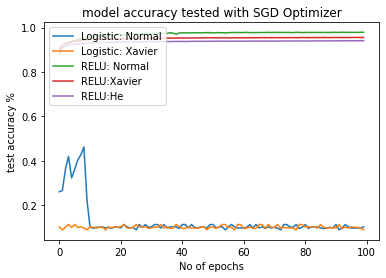

In [151]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with SGD Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [152]:
model1.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [153]:
history1 = model1.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9274 - accuracy: 0.6712 - val_loss: 0.4292 - val_accuracy: 0.8679
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3643 - accuracy: 0.8877 - val_loss: 0.3003 - val_accuracy: 0.9075
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2979 - accuracy: 0.9071 - val_loss: 0.2590 - val_accuracy: 0.9213
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2599 - accuracy: 0.9192 - val_loss: 0.2467 - val_accuracy: 0.9243
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2453 - accuracy: 0.9233 - val_loss: 0.2410 - val_accuracy: 0.9244
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2362 - accuracy: 0.9264 - val_loss: 0.2604 - val_accuracy: 0.9182
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2219 - accuracy: 0.9298 - val_loss: 0.2272 - val_accuracy: 0.9279

In [154]:
history2 = model2.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7112 - accuracy: 0.7616 - val_loss: 0.3465 - val_accuracy: 0.8928
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3126 - accuracy: 0.9021 - val_loss: 0.3126 - val_accuracy: 0.9021
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2630 - accuracy: 0.9188 - val_loss: 0.2463 - val_accuracy: 0.9240
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2328 - accuracy: 0.9276 - val_loss: 0.2207 - val_accuracy: 0.9316
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2066 - accuracy: 0.9357 - val_loss: 0.1918 - val_accuracy: 0.9388
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1945 - accuracy: 0.9384 - val_loss: 0.1808 - val_accuracy: 0.9445
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1822 - accuracy: 0.9415 - val_loss: 0.1787 - val_accuracy: 0.9437

In [155]:
history3 = model3.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.0407 - accuracy: 0.8600 - val_loss: 0.1921 - val_accuracy: 0.9436
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1747 - accuracy: 0.9477 - val_loss: 0.1650 - val_accuracy: 0.9520
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1393 - accuracy: 0.9585 - val_loss: 0.1404 - val_accuracy: 0.9585
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1192 - accuracy: 0.9637 - val_loss: 0.1376 - val_accuracy: 0.9590
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.1285 - val_accuracy: 0.9620
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0921 - accuracy: 0.9718 - val_loss: 0.1268 - val_accuracy: 0.9646
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0853 - accuracy: 0.9738 - val_loss: 0.1240 - val_accuracy: 0.9632

In [156]:
history4 = model4.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.1588 - accuracy: 0.9000 - val_loss: 0.1767 - val_accuracy: 0.9472
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1441 - accuracy: 0.9563 - val_loss: 0.1580 - val_accuracy: 0.9521
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1086 - accuracy: 0.9672 - val_loss: 0.1265 - val_accuracy: 0.9615
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0880 - accuracy: 0.9729 - val_loss: 0.1228 - val_accuracy: 0.9662
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0769 - accuracy: 0.9759 - val_loss: 0.1216 - val_accuracy: 0.9685
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.1242 - val_accuracy: 0.9657
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.1285 - val_accuracy: 0.9666

In [157]:
history5 = model5.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.2990 - accuracy: 0.9055 - val_loss: 0.1813 - val_accuracy: 0.9450
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1313 - accuracy: 0.9606 - val_loss: 0.1473 - val_accuracy: 0.9581
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0927 - accuracy: 0.9711 - val_loss: 0.1350 - val_accuracy: 0.9623
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0765 - accuracy: 0.9761 - val_loss: 0.1475 - val_accuracy: 0.9602
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.1292 - val_accuracy: 0.9663
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0634 - accuracy: 0.9799 - val_loss: 0.1416 - val_accuracy: 0.9636
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.1408 - val_accuracy: 0.9684

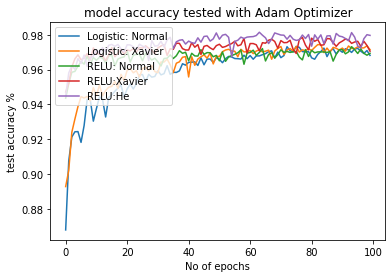

In [158]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with Adam Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [ ]:
# w_value = xavier_initializer(shape=(784,512))
# b_value = xavier_initializer(shape=(512,))
# model1.layers[1].set_weights([w_value,b_value])
# w_value1 = xavier_initializer(shape=(512,512))
# model1.layers[2].set_weights([w_value1,b_value])
# w_value2 = xavier_initializer(shape=(512,512))
# model1.layers[3].set_weights([w_value2,b_value])
# w_value3 = xavier_initializer(shape=(512,512))
# model1.layers[4].set_weights([w_value3,b_value])
# w_value4 = xavier_initializer(shape=(512,10))
# b_value4 = xavier_initializer(shape=(10,))
# model1.layers[5].set_weights([w_value4,b_value4])

3.Dropout

In [177]:
model6 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10,kernel_initializer=xavier_initializer)
])

In [178]:
model7 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10,kernel_initializer=xavier_initializer)
])

In [179]:
model8 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(10,kernel_initializer=he_initializer)
])

In [180]:
model9 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10,kernel_initializer=he_initializer)
])

In [181]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# print("[INFO] training network...")
model6.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model7.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model8.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model9.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [ ]:
history6 = model6.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

In [ ]:
history7 = model7.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

In [ ]:
history8 = model8.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

In [ ]:
history9 = model9.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

In [ ]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('1024*5 Logistic')
plt.ylabel('Cross Entropy Error')
plt.xlabel('No of epochs')
plt.legend(['No DropOut: Train Loss','No DropOut: Test Loss','DropOut:Train Loss','DropOut:Test Loss'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('1024*5 ReLU')
plt.ylabel('Cross Entropy Error')
plt.xlabel('No of epochs')
plt.legend(['No DropOut: Train Loss','No DropOut: Test Loss','DropOut:Train Loss','DropOut:Test Loss'], loc='upper left')
plt.show()